# `Heart Disease Classification` 

This notebook looks into using various python-based ml and ds libararies in an attempt to build a ml model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### Problem defination
Given clinical parameters about a patient, we have to predict whether or not they have heart disease!

### Data
The original data came from the Cleavland data from the UCI Machine Learning Repository.
There is also a version of it available for kaggle.

### Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of conceptt, we'll pursue the project.

### Features
** Create a Data Dictionary **
which features are used for which type of parameter during heart disease prediction


In [1]:
# import all the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


### `Load Data`

In [4]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

In [5]:
# data exploration
# the goal here is to find out more aobut the data and become a subject matter expert on the dataset yo're working with.

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df["target"].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [10]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

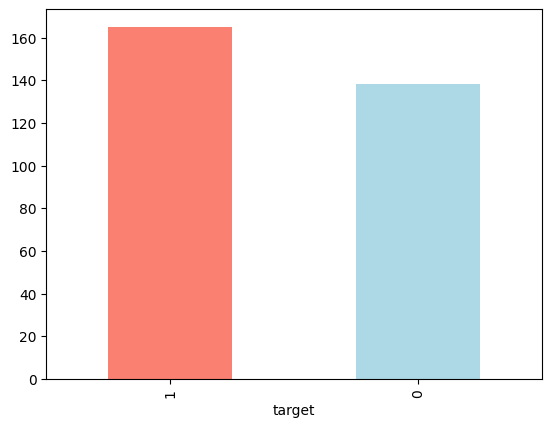

In [12]:
df["target"].value_counts().plot(kind="bar", color=["Salmon", "lightblue"]);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# are there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### `finding patterns`



In [20]:
# Fequency according to sex
df.sex.value_counts(), df.target.value_counts()

(sex
 1    207
 0     96
 Name: count, dtype: int64,
 target
 1    165
 0    138
 Name: count, dtype: int64)

In [21]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


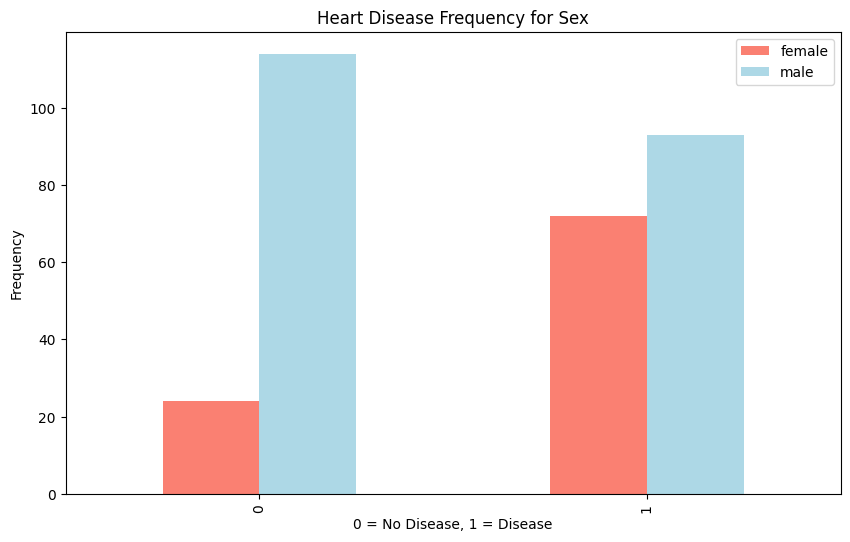

In [27]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["female", "male"]);

In [28]:
df["thalach"].value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

length == 91 --> which means the lenght is very high, which means lots of different values, so it can't be used for finding patterns or something

### Age vs Max Heart rate for Heart Disease

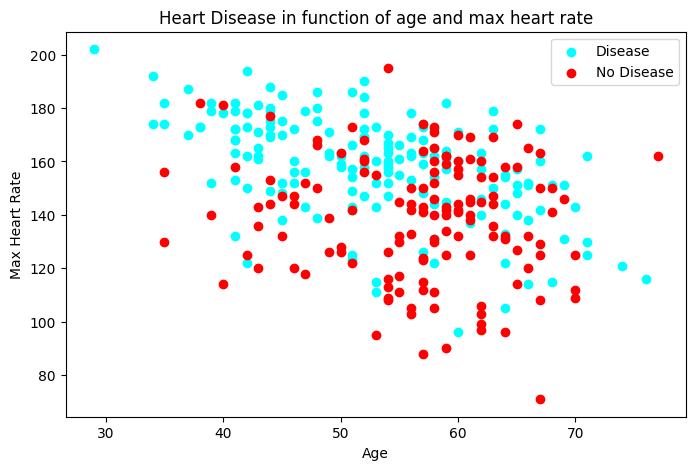

In [44]:
# Create another figure
plt.figure(figsize=(8, 5))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="cyan");

# scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="red");

# add some useful info
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

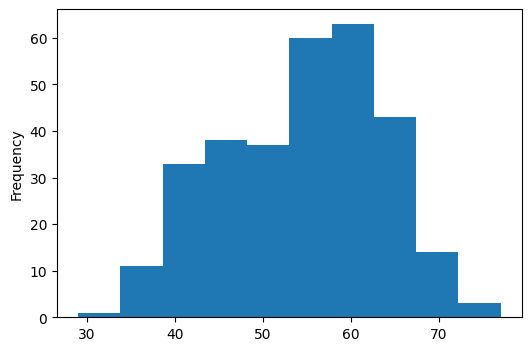

In [42]:
# check the distribution of age column with a histogram
df.age.plot.hist(figsize=(6, 4));

heart disease frequency per chest pain type:
1. ---> 0 : Typical angina : chest pain related decrease blood supply to the heart
2. ---> 1 : Atypical angina : chest pain not related to heart
3. ---> 2 : Non-anginal pain : typcially esophageal spasms(non heart related)
4. ---> 3 : Asymptomatic : chest pain not showing signs of disease

In [39]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


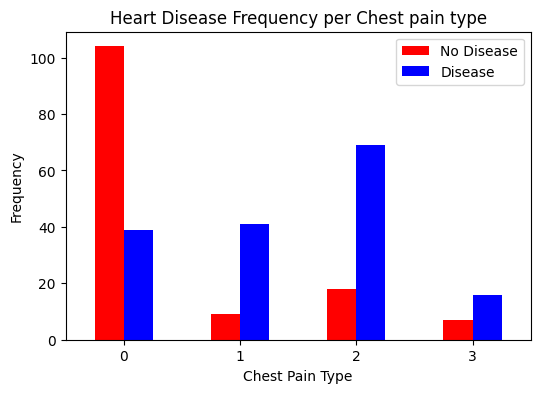

In [41]:
# make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(6, 4),
                                   color=["red", "blue"])
# add some info
plt.title("Heart Disease Frequency per Chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [45]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


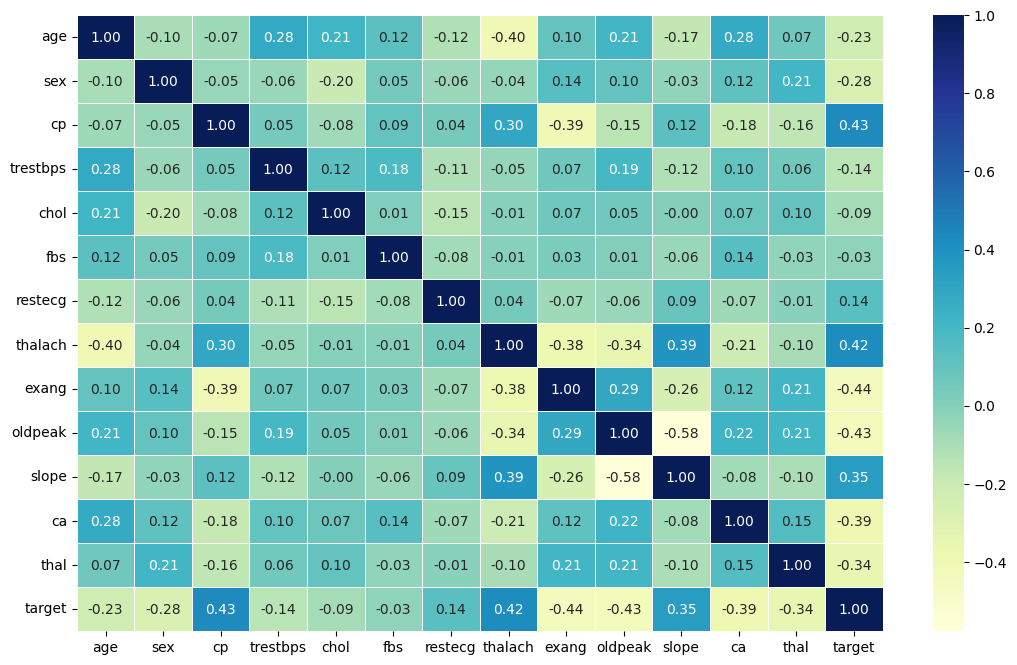

In [48]:
# lets make our correlation matrix beautiful
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(13, 8))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")


### `Modelling`

In [50]:
# split the data into x, y
X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(21)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

WE ARE GOING TO TRY 3 DIFFERENT ML MODELS:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [51]:
# Put the models in the dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    models: a dict of different scikit-learn ml models
    X_train: training data(no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: test lablels"""

    np.random.seed(21)

    # make a dictionary to keep model scores
    model_scores = {}

    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)

    return model_scores




In [52]:
models_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

models_scores

c:\Users\heman\Machine-Learning-AI-Complete-01\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.819672131147541}

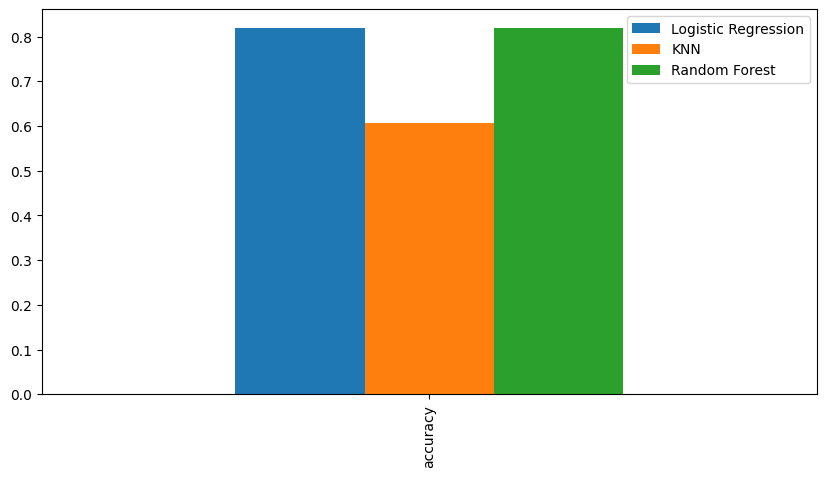

In [62]:
model_compare = pd.DataFrame(models_scores, index=["accuracy"])
model_compare.plot.bar(figsize=(10, 5));

Now we have got our baseline model, and we know a models first prediction aren't always what we should based ...

### `Tuning the model`

In [64]:
# lets tune KNN

train_scores = []
test_scores = []

# create a list of different values for n_neighbours
neighbors = range(1, 21)

# setup KNN instances
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

train_scores

[1.0,
 0.7975206611570248,
 0.7851239669421488,
 0.7603305785123967,
 0.7768595041322314,
 0.7603305785123967,
 0.756198347107438,
 0.731404958677686,
 0.7396694214876033,
 0.7024793388429752,
 0.6942148760330579,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.6942148760330579,
 0.6983471074380165,
 0.6983471074380165,
 0.6942148760330579,
 0.6859504132231405,
 0.6942148760330579]

In [65]:
test_scores

[0.6229508196721312,
 0.47540983606557374,
 0.639344262295082,
 0.6229508196721312,
 0.6065573770491803,
 0.5737704918032787,
 0.6885245901639344,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344]

![](abc.jpg)

### `while previous score was just 60%`

Maximum KNN score on the test data: 72.13%


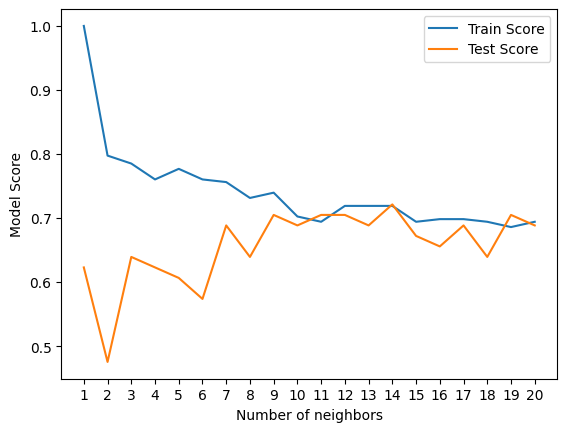

In [67]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### `Hyperparameter tuning using RandomizedSearchCV`

In [69]:
# lets tune Logistic Regression and Random Forest using RandomizedSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "max_features": ["sqrt", "log2"],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [71]:
np.random.seed(21)

# setup random hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [72]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.615848211066026)}

In [73]:
rs_log_reg.score(X_test, y_test)

0.8032786885245902

In [75]:
np.random.seed(21)

# setup random hyperparameter search for Random forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# fit random hyperparameter search model for Random forest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [76]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(7),
 'max_features': 'log2',
 'max_depth': 3}

In [77]:
rs_rf.score(X_test, y_test)

0.819672131147541

### `Hyperparameter tuning using GridSearchCV`

In [78]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# setup grid hyperparameter search for LogisticRegression()
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [79]:
gs_log_reg.best_params_

{'C': np.float64(0.38566204211634725), 'solver': 'liblinear'}

In [80]:
gs_log_reg.score(X_test, y_test)

0.8032786885245902

In [81]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "max_features": ["sqrt", "log2"],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, cv=5, verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 14400 candidates, totalling 72000 fits


KeyboardInterrupt: 

In [ ]:
gs_rf.best_params_

In [ ]:
gs_rf.score(X_test, y_test)

### took long time, so i just skipped it

## Evaluating our tuned ml classifiers beyond accuracy

In [82]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

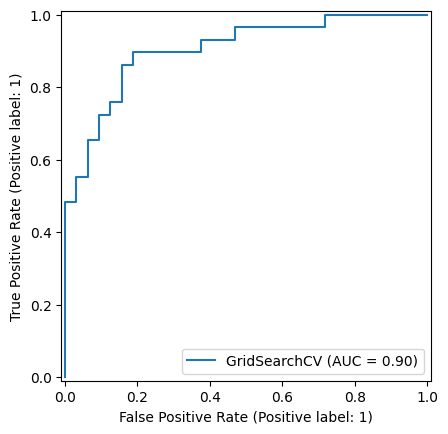

In [85]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test);

In [86]:
# confusion matrix
print("confusion_matrix: \n", confusion_matrix(y_test, y_preds))

confusion_matrix: 
 [[27  5]
 [ 7 22]]


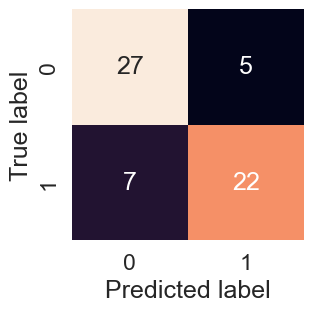

In [90]:
sns.set_theme(font_scale=1.5)

def plot_conf_mat(ytest, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(ytest, y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds)

In [91]:
# Classification report:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.81      0.76      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [92]:
# calculate evaluation matrix using cross-validation

# check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.38566204211634725), 'solver': 'liblinear'}

In [93]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.38566204211634725, solver='liblinear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8032786885245902

In [95]:
# cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [96]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8380874316939891)

In [97]:
# cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.775     , 0.88235294, 0.85714286, 0.83783784, 0.725     ])

In [98]:
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8154667272314331)

In [99]:
# cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9151515151515153)

In [100]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8614850462777628)

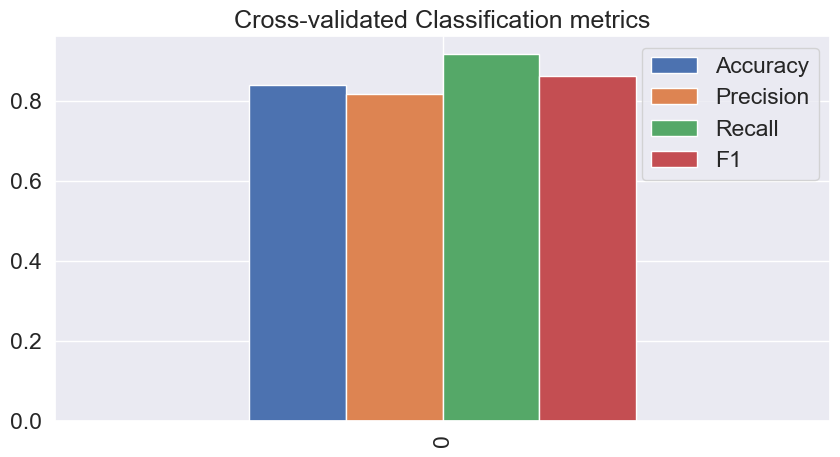

In [104]:
# Visualize cross-validated matrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.plot.bar(title="Cross-validated Classification metrics", legend=True, figsize=(10, 5));

## `Feature Importance`

Feature importance is another as asking: "which features contributed most to the outcomes of the model and how they contribute?"

Lets find the features importance for our Logistic Regression Model..

In [106]:
# Fit an instance of Logistic Regresssion
gs_log_reg.best_params_

clf = LogisticRegression(C=0.38566204211634725, solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [108]:
# check coefficient
clf.coef_

array([[ 1.68406963e-04, -1.14521924e+00,  7.79437805e-01,
        -1.59284810e-02, -3.81621872e-03, -7.06182105e-02,
         2.67914644e-01,  3.62062606e-02, -7.91239209e-01,
        -4.05841120e-01,  4.11140485e-01, -6.38510806e-01,
        -8.36878353e-01]])

In [109]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0001684069629922056),
 'sex': np.float64(-1.1452192393309009),
 'cp': np.float64(0.7794378050472677),
 'trestbps': np.float64(-0.015928480953284647),
 'chol': np.float64(-0.0038162187199631842),
 'fbs': np.float64(-0.07061821045609279),
 'restecg': np.float64(0.26791464436156537),
 'thalach': np.float64(0.03620626055044743),
 'exang': np.float64(-0.7912392091083482),
 'oldpeak': np.float64(-0.4058411195758031),
 'slope': np.float64(0.41114048536998477),
 'ca': np.float64(-0.6385108056868143),
 'thal': np.float64(-0.8368783532365996)}

In [110]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


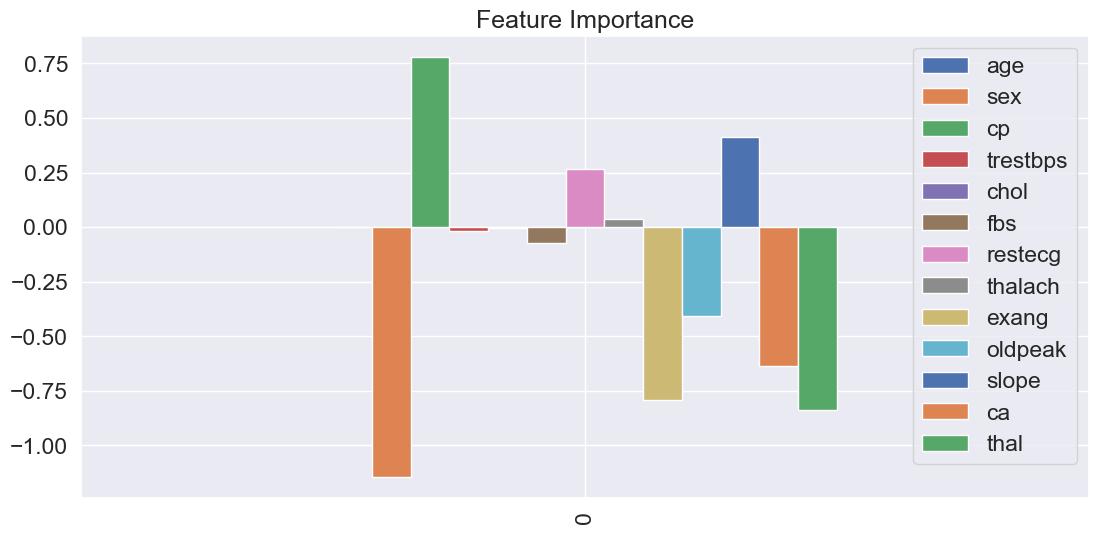

In [116]:
# visualize the features importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.plot.bar(title="Feature Importance", legend=True, figsize=(13, 6));